# SUPERVISED LEARNING - THE FLOWER CHALLENGE

Copyright © The content of this project instruction is proprietary and confidential information of Kinestry Ltd. It is not intended to be distributed to any third party without the prior written consent of Kinestry Ltd.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

## Dataset

In [5]:
# import some data to play with
iris = datasets.load_iris()

In [6]:
# dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Explore the data

In [7]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

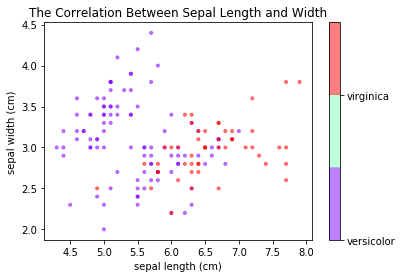

In [8]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df['sepal length (cm)']
y = df['sepal width (cm)']
area = np.pi*3
colors = data.target

plt.scatter(x, y, s = area, c = colors, cmap=plt.cm.get_cmap('rainbow', 3), alpha = 0.5)
formatter = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(1, 2.5)
plt.title('The Correlation Between Sepal Length and Width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

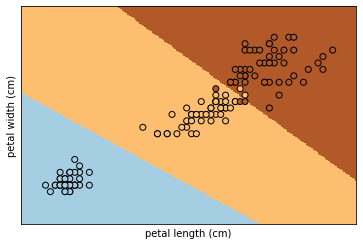

In [9]:
from sklearn.linear_model import LogisticRegression

x = data.data[:, 2:]  # we only take the first two features.
y = data.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

logreg.fit(x, y)

x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3]);

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Build the model

In [10]:
X_new = [1.5, 2.5, 2, 1]

def predict_new(clf, X_pred=X_new):
    result = clf.predict([X_pred, ])
    print('The new flower is a', data.target_names[result])


knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
x, y = data.data, data.target
knn.fit(x, y)

predict_new(knn)

The new flower is a ['setosa']


## Train the model

#### KNN

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5)
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(y_pred)

[0 2 0 1 0 0 2 1 2 1 2 1 1 2 1 2 2 0 0 1 2 1 2 2 1 0 0 0 1 0 1 0 2 2 2 2 1
 2 1 2 1 2 2 2 1 0 2 1 2 0 1 1 0 2 0 0 2 0 1 0 2 2 0 2 2 2 1 0 0 0 1 0 2 1
 1]


#### Logistic Regression

In [12]:
clflog = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
clflog.fit(data.data, data.target)
n_samples, n_features = data.data.shape
test_target = data.target
test_data = data.data + np.random.rand(n_samples, n_features)
clflog.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Evaluate model

In [13]:
print(accuracy_score(y_test, y_pred))

0.96


In [14]:
clflog.score(data.data, data.target)
clflog.score(test_data, test_target)

0.8666666666666667

## Conclusion
In this challenge, we used K Nearest Neighbors and Logistic Regression to build and train supervised learning models to predict the flower types. We see a 98.66% accuracy when using the K Nearest Neighbors algorithm (looking at the 3 closest neighbors for each test data point), whereas we saw a 87.33% accuracy when using the Logistic Regression algorithm. 

This means that for this particular data set, we would suggest Bumblebee use the K Nearest Neighbors algorithm to best predict the flower type for new iris flowers in their store.